## Сравнение оценок. Эффективные оценки

In [2]:
%matplotlib inline
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import math

---
### Задача 1

In [161]:
M = 100  #кол-во выборок
N = 1000  #размер каждой выборки
n = np.arange(1, N + 1)  
theta = np.array([1, 10, 100]) #параметр
#сгенерировали M выборок
Array_X = np.array([np.array([sps.uniform.rvs(size=N, loc=0, scale=t) for i in range(0, M)]) for t in theta])

**Считаем оценки** для $$2\overline{X} \tag{1}$$ $$(n + 1)X_{(1)} \tag{2}$$ $$X_{(1)} + X_{(n)} \tag{3}$$ $$\frac{n + 1}{n}X_{(n)}\tag{4}$$ 

In [162]:
array_estimate1 = np.array([np.array([2 * Array_X[j][i].cumsum() / n for i in range(0, M)]) \
                            for j in range(0, theta.size)]) #1
array_estimate2 = np.array([np.array([(n + 1) * np.minimum.accumulate(Array_X[j][i]) for i in range(0, M)]) \
                            for j in range(0, theta.size)]) #2
array_estimate3 = np.array([np.array([np.maximum.accumulate(Array_X[j][i]) + np.minimum.accumulate(Array_X[j][i]) \
                                      for i in range(0, M)]) for j in range(0, theta.size)]) #3
array_estimate4 = np.array([np.array([(n + 1) * np.maximum.accumulate(Array_X[j][i]) / n for i in range(0, M)]) \
                            for j in range(0, theta.size)]) #4

**Считаем квадратичную функцию потерь** и усредняем по всем выборкам от (1 до M) $\:(\hat{\theta} - \theta)^2 $ 

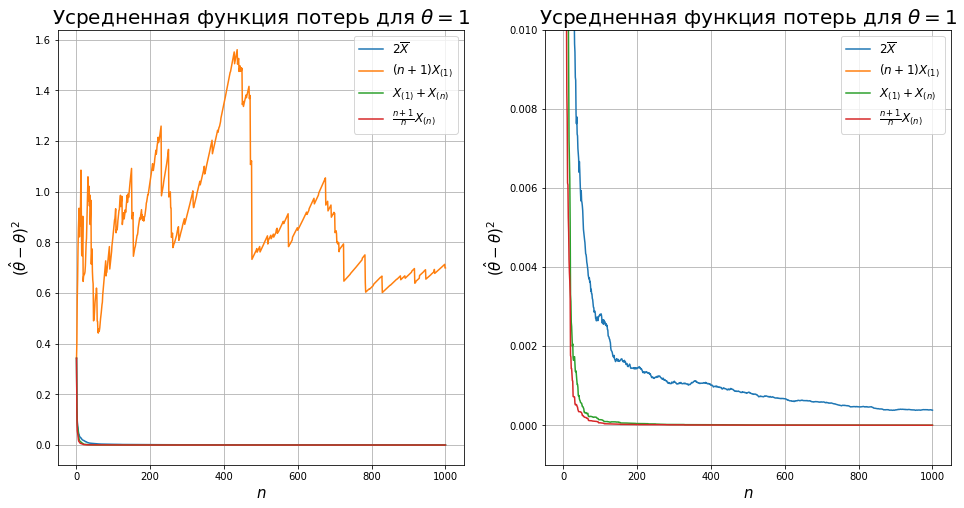

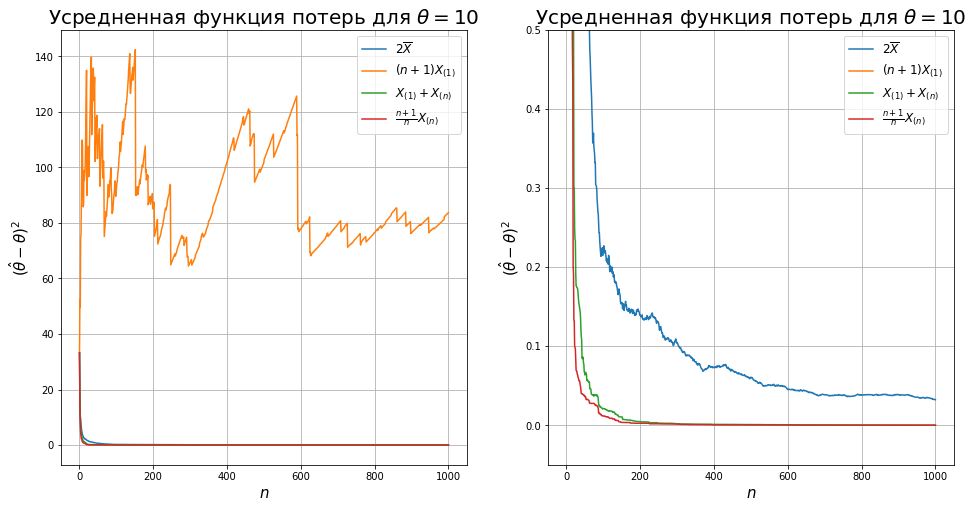

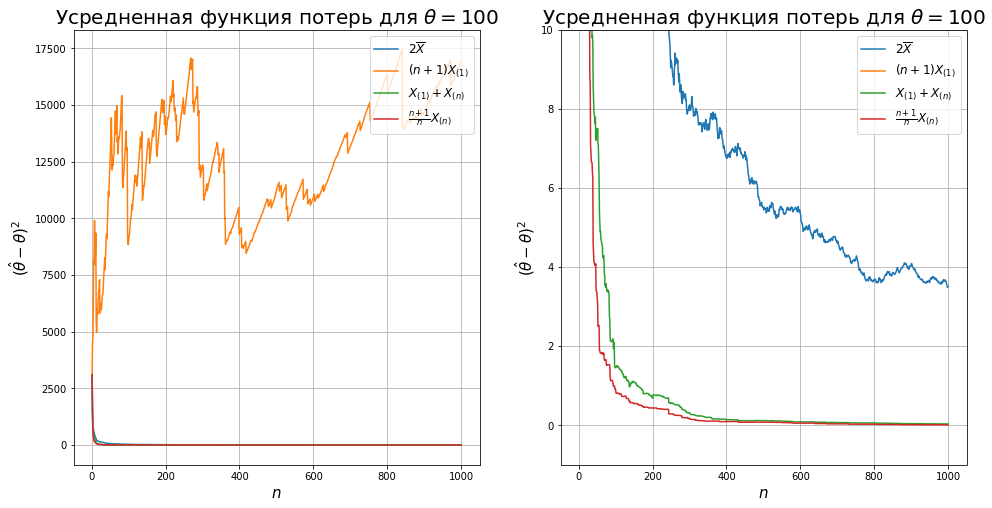

In [167]:
R1 = np.array([np.average(np.array([(array_estimate1[j][i] - theta[j]) ** 2 for i in range(0, M)]), axis=0) \
               for j in range(0, theta.size)])
R2 = np.array([np.average(np.array([(array_estimate2[j][i] - theta[j]) ** 2 for i in range(0, M)]), axis=0) \
               for j in range(0, theta.size)])
R3 = np.array([np.average(np.array([(array_estimate3[j][i] - theta[j]) ** 2 for i in range(0, M)]), axis=0) \
               for j in range(0, theta.size)])
R4 = np.array([np.average(np.array([(array_estimate4[j][i] - theta[j]) ** 2 for i in range(0, M)]), axis=0) \
               for j in range(0, theta.size)])
limits = np.array([0.01, 0.5, 10])
#построим 2 графика, один в увуличенном масштабе, другой - в обычном
for i in range(0, theta.size):
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.title(r'Усредненная функция потерь для $\theta = $' + str(theta[i]), fontsize=20)
    plt.plot(n, R1[i], label=r'$2\overline{X}$')
    plt.plot(n, R2[i], label=r'$(n + 1)X_{(1)}$')
    plt.plot(n, R3[i], label=r'$X_{(1)} + X_{(n)}$')
    plt.plot(n, R4[i], label=r'$\frac{n + 1}{n}X_{(n)}$')
    plt.ylabel(r'$(\hat{\theta} - \theta)^2$', fontsize=15)
    plt.xlabel(r'$n$', fontsize=15)
    plt.legend(fontsize=12, loc=1)
    plt.grid()
    #в увеличенном масштабе
    plt.subplot(1, 2, 2)
    plt.title(r'Усредненная функция потерь для $\theta = $' + str(theta[i]), fontsize=20)
    plt.ylim(-limits[i] / 10, limits[i])
    plt.plot(n, R1[i], label=r'$2\overline{X}$')
    plt.plot(n, R2[i], label=r'$(n + 1)X_{(1)}$')
    plt.plot(n, R3[i], label=r'$X_{(1)} + X_{(n)}$')
    plt.plot(n, R4[i], label=r'$\frac{n + 1}{n}X_{(n)}$')
    plt.ylabel(r'$(\hat{\theta} - \theta)^2$', fontsize=15)
    plt.xlabel(r'$n$', fontsize=15)
    plt.legend(fontsize=12, loc=1)   
    plt.grid()

Итак, для каждого размера выборки $n$, усреднив по всем выборкам, мы смогли посчитать некоторый аналог функции риска. Видно, что $\frac{n+1}{n}X_{(n)}$-получилась лучше остальных. Это логично, ведь в раномерном подходе эта оценка лучше остальных приведенных. 

---
### Задача 2

In [200]:
N = 100
n = np.arange(1, N + 1)
m = 50
sigma = 2.1
#Beta(1, 1) генерация параметров с таким распределением
params = sps.beta.rvs(size=3, a=1, b=1)
p = params[0]  #парметр для Bin() распределения
lamb = params[2] #парметр для Exp() распределения
Bin = sps.binom.rvs(size=N, n=m, p=p)
Norm = sps.norm.rvs(size=N, loc=params[1], scale=sigma)
Expon = sps.expon.rvs(size=N, scale= 1 / lamb)

In [201]:
#расчитываем эффективные оценки----------------------
effective_estimate_Bin_p = (Bin.cumsum() / n) / m
effective_estimate_Norm_a = (Norm.cumsum() / n) 
effective_estimate_expon = Expon.cumsum() / n
#другие оценки--------------------------------
bad_estimate_Bin = np.ones(N) * Bin[0] / m
temp = n.copy()
temp[0] = 2
bad_estimate_Expon = Expon.cumsum() / (temp - 1)
#считаем выборочные медианы
bad_estimate_Norm = np.ones(N) 
for i in n:
    Norm_sort = np.sort(Norm[:i])
    if(i % 2 == 0):
        bad_estimate_Norm[i - 1] = (Norm_sort[int(i / 2 - 1)] + Norm_sort[int(i / 2)]) / 2
    else:
        bad_estimate_Norm[i - 1] = Norm_sort[int(i / 2)]

In [202]:
K = 500  #кол-во бутстрепных выборок
#генерируем параметрический бустреп-------------------------------------------------------------------------
but_Bin_p = np.array([np.array([np.average(sps.binom.rvs(size=n[i], n=m, p=effective_estimate_Bin_p[i])) / m \
                      for k in range(K)]) for i in range(0, N)])
but_Norm_a=np.array([np.array([np.average(sps.norm.rvs(size=n[i], loc=effective_estimate_Norm_a[i], scale=sigma)) \
                               for k in range(K)]) for i in range(0, N)])
but_Expon = np.array([np.array([np.average(sps.expon.rvs(size=n[i], scale=effective_estimate_expon[i])) \
                      for k in range(K)]) for i in range(0, N)])
#Теперь то же самое, но для других оценок---------------------------------------------------------------
def Sample_Med(X):
    temp = np.sort(X)
    if(X.size % 2 == 0):
        return (temp[int(X.size / 2) - 1] + temp[int(X.size / 2)]) / 2
    if(X.size % 2 == 1):
        return temp[int(X.size / 2)]
    
but_bad_Bin_p = np.array([np.array([(sps.binom.rvs(size=n[i], n=m, p=bad_estimate_Bin[i]))[0] / m \
                          for k in range(K)]) for i in range(0, N)])
but_bad_Norm_a = np.array([np.array([Sample_Med(sps.norm.rvs(size=n[i], loc=bad_estimate_Norm[i], scale=sigma)) \
                                     for k in range(K)]) for i in range(0, N)])
but_bad_Expon=np.array([np.array([np.sum(sps.expon.rvs(size=n[i], scale=bad_estimate_Expon[i])) / (max(n[i] - 1, 1)) \
                                    for k in range(K)]) for i in range(0, N)])

* Для биномиального распределения $Bin(m, p)$:

0.002047249600000023


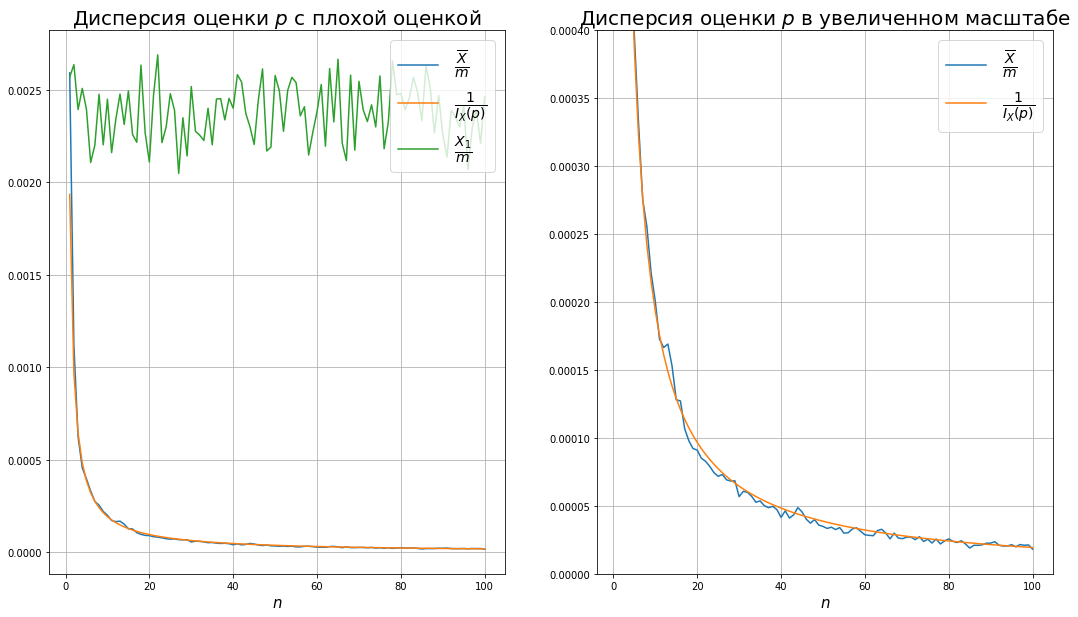

In [208]:
#считаем праметрическим бутстрепом дисперсию оценки
var_bin = np.array([np.sum(X**2) / X.size - (np.sum(X) / X.size)**2 for X in but_Bin_p])
var_bad_bin = np.array([np.sum(X**2) / X.size - (np.sum(X) / X.size)**2 for X in but_bad_Bin_p])
info_bin = n * (m / (p * (1 - p)))  #информация Фишера
print(var_bad_bin.min())
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
plt.title(r'Дисперсия оценки $p$ с плохой оценкой', fontsize=20)
plt.xlabel(r'$n$', fontsize=15)
plt.plot(n, var_bin, label=r'$\frac{\overline{X}}{m}$')
plt.plot(n, 1 / info_bin, label=r'$\frac{1}{I_{X}(p)}$')
plt.plot(n, var_bad_bin, label=r'$\frac{X_1}{m}$')
plt.legend(fontsize=20, loc=1)
#plt.ylim(0, 0.00001)
plt.grid()
plt.subplot(1, 2, 2)
plt.title(r'Дисперсия оценки $p$ в увеличенном масштабе', fontsize=20)
plt.xlabel(r'$n$', fontsize=15)
plt.plot(n, var_bin, label=r'$\frac{\overline{X}}{m}$')
plt.plot(n, 1 / info_bin, label=r'$\frac{1}{I_{X}(p)}$')
plt.ylim(0, 0.0004)
plt.legend(fontsize=20, loc=1)
plt.grid()

Итак, на левом графике мы наблюдаем выполнение **неравенства Крамера-Рао**: $D_{\theta}\hat{\theta}(X) \geqslant \cfrac{(\tau'(\theta))^2}{I_X(\theta)}$. В нашем случае $\tau(\theta) = \theta$ и оценка $\cfrac{\overline{X}}{m}$ является эффективной, то есть на графике совпадают две линии (дисперсии оценки и обратная величина к количеству информации Фишера). Для оценки $\cfrac{X_1}{m}$ дисперсия оказывается значительно больше ее возможной нижней границы. 

* **Для нормального распределения** $N(a, \sigma^2)$:

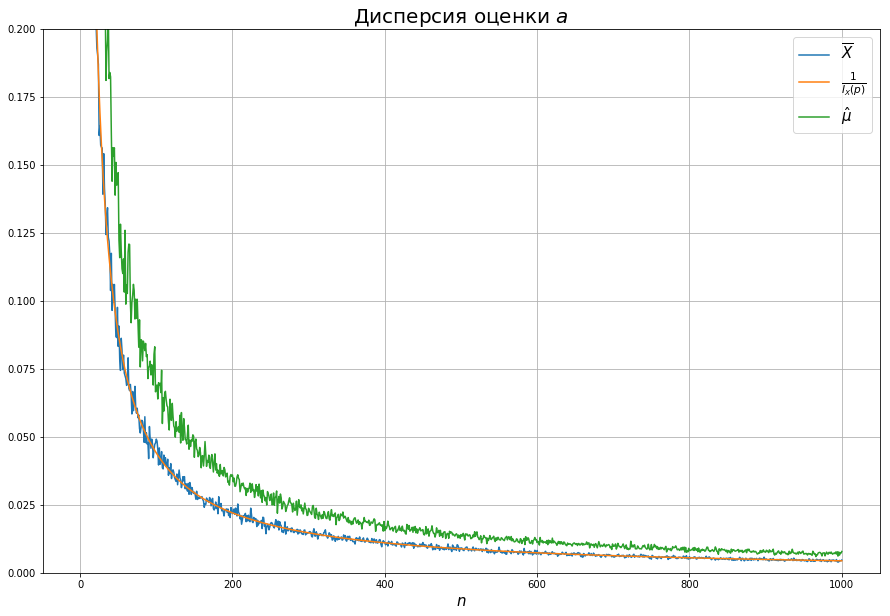

In [191]:
var_norm = np.array([np.sum(X**2) / X.size - (np.sum(X) / X.size)**2 for X in but_Norm_a]) #бутстрепная оценка дисперсии
bad_var_norm = np.array([np.sum(X**2) / X.size - (np.sum(X) / X.size)**2 for X in but_bad_Norm_a])
info_norm = n * (1 / sigma**2)  #информация Фишера
plt.figure(figsize=(15, 10))
plt.title(r'Дисперсия оценки $a$', fontsize=20)
plt.xlabel(r'$n$', fontsize=15)
plt.plot(n, var_norm, label=r'$\overline{X}$')
plt.plot(n, 1 / info_norm, label=r'$\frac{1}{I_{X}(p)}$')
plt.plot(n, bad_var_norm, label=r'$\hat{\mu}$')
plt.legend(fontsize=15)
plt.ylim(0, 0.2)  
plt.grid()

Здесь аналогичные рассуждения как и в предыдущем пункте. Но следует заметить, что оценка $\hat{\mu}(X)$ оказывается ненамного хуже эффективной оценки, ну что логично, ведь такая оценка яляется состоятельной и ассимптотически нормальной оценкой парметра $a$ по т о Выборочной квантили. 

* **Для экспоненциального распределения** $Exp(\lambda)$:

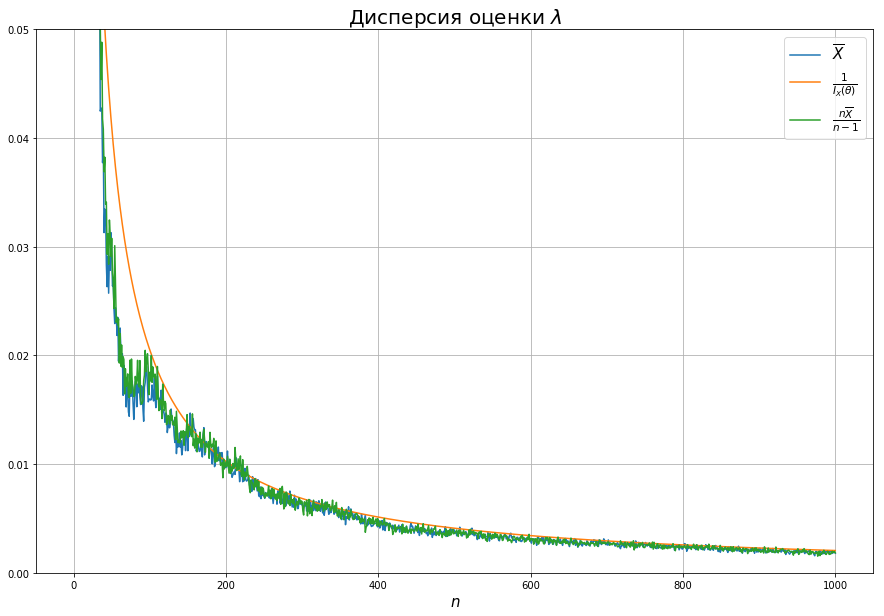

In [190]:
var_exp = np.array([np.average(X**2) - np.average(X)**2 for X in but_Expon]) #бутстрепная оценка дисперсии
bad_var_exp = np.array([np.sum(X**2) / X.size - (np.sum(X) / X.size)**2 for X in but_bad_Expon]) #бутстрепная оценка дисперсии
info_exp = n / (lamb ** 2)  #информация Фишера
plt.figure(figsize=(15, 10))
plt.title(r'Дисперсия оценки $\lambda$', fontsize=20)
plt.xlabel(r'$n$', fontsize=15)
plt.plot(n, var_exp, label=r'$\overline{X}$')
plt.plot(n, (1 / lamb**4)*(1 / info_exp), label=r'$\frac{1}{I_{X}(\theta)}$')
plt.plot(n, bad_var_exp, label=r'$\frac{n\overline{X}}{n-1}$')
plt.ylim(0, 0.05)
plt.legend(fontsize=15)
plt.grid()

Здесь тоже все аналогично. Но, здесь на графике проведена $\cfrac{(\tau'(X))^2}{I_X(\theta)} = \cfrac{1}{\theta^4I_X(\theta)}$, так как $\overline{X}$ эффективная несмещенная оценка для $\tau(\theta) = \cfrac{1}{\theta}$. Заметим, что оценка $\cfrac{n\overline{X}}{n-1}$ по дисперсии практически совпадает с эффективной. 

---
### Задача 3

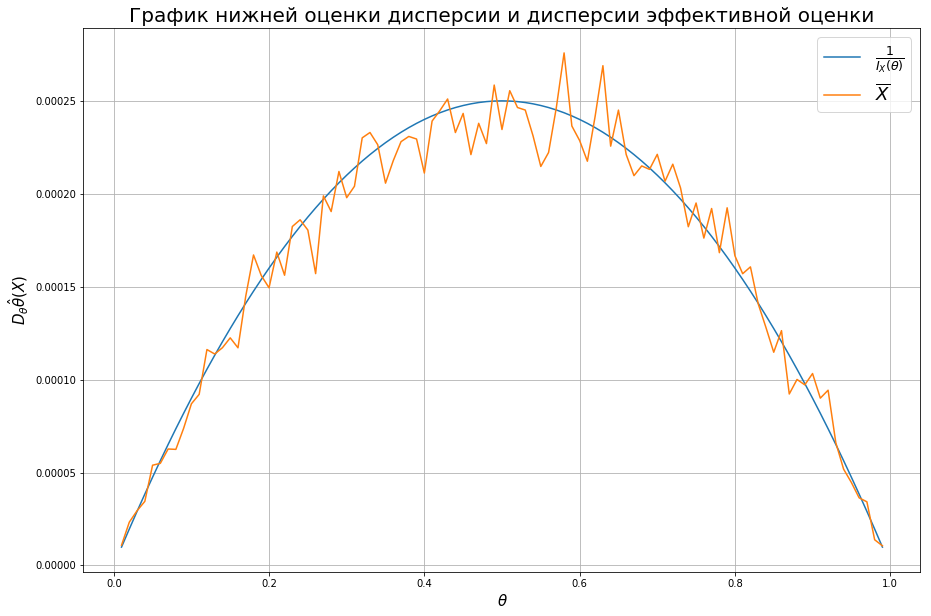

In [210]:
N = 1000
step = 10**(-2)
theta_grid = np.arange(0 + step, 1 - step / 2, step)
#Рассчитываем информацию Фишера-------------------------------
I_Bern = N / (theta_grid * (1 - theta_grid))
#отображаем на графике------------------------------------
plt.figure(figsize=(15, 10))
plt.title(r'График нижней оценки дисперсии и дисперсии эффективной оценки', fontsize=20)
plt.plot(theta_grid, 1 / I_Bern, label=r'$\frac{1}{I_{X}(\theta)}$')
#Оцениваем параметрическим бутструпом дисперсию оценки----------------
Bern = np.array([sps.binom.rvs(size=N, n=1, p=theta) for theta in theta_grid])
effective_bern = np.array([np.average(X) for X in Bern])
K = 500
but_bern = np.array([np.array([np.average(sps.binom.rvs(size=N, n=1, p=estimate)) for k in range(K)]) \
                     for estimate in effective_bern])
var_estimate = np.array([np.average(X**2) - np.average(X)**2 for X in but_bern])
#отображаем на графике
plt.plot(theta_grid, var_estimate, label=r'$\overline{X}$')
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel(r'$D_{\theta}\hat{\theta}(X)$', fontsize=15)
plt.legend(fontsize=18, loc=1)
plt.grid()

Из графика видно, что чем ближе $\theta$ к $\frac{1}{2}$ тем больше будет дисперсия любой несмещенной оценки этого параметра. Ну и так как $\overline{X}$ - эффективная оцнека, то кривые нижней оценки дисперсии и самой дисперсии практически совпадают. 

In [214]:
op = np.arange(1, 10)
print(op[:1])

[1]
